# **PPDai Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

ppdai_dataset_path = '../../datasets/PPDaiData/ppdaiData.csv'
ppdai_prep_dataset_path = '../../datasets/preprocessed/ppdai/'

(CVXPY) Mar 05 01:16:21 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Mar 05 01:16:21 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(ppdai_prep_dataset_path)

In [3]:
data = utilities.read_csv(ppdai_dataset_path, dtype={'label':bool})
data

,sex,occupation,education,marriage,household,income,outcome,income_tm,outcome_tm,tm_encode_3,...,cash_limit,repay_state,browse_data,loan_time,time,yu_e,yu_e_categery,yu_e_tm,yu_e_tm_categery,label
0,1,2,3,1,3,13.734079,13.255397,5.900126e+09,5.900935e+09,0.000000e+00,...,0.000000,0.0,0.0,5914855887,5.914856e+09,0.478681,1.0,-8.094010e+05,3.0,False
1,1,2,3,2,1,0.000000,0.000000,0.000000e+00,0.000000e+00,5.659685e+09,...,7.087560,0.0,151500.0,5914855887,2.551708e+08,0.000000,2.0,0.000000e+00,2.0,False
2,1,4,4,1,4,13.249264,9.834236,4.767557e+09,5.899778e+09,0.000000e+00,...,0.000000,0.0,38586.0,5914855887,5.914856e+09,3.415028,1.0,-1.132222e+09,3.0,False
3,1,4,4,3,2,12.128566,10.920132,5.042088e+09,5.902715e+09,5.912412e+09,...,7.808445,0.0,38764.0,5914855887,2.443522e+06,1.208435,1.0,-8.606264e+08,3.0,True
4,1,2,2,3,1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,19.971271,0.0,0.0,5914855887,5.914856e+09,0.000000,2.0,0.000000e+00,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,1,2,3,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.937622e+09,...,12.357302,0.0,46890.0,5932135887,-5.486400e+06,0.000000,2.0,0.000000e+00,2.0,False
55592,1,4,2,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.907957e+09,...,7.284420,0.0,19600.0,5932135887,2.417882e+07,0.000000,2.0,0.000000e+00,2.0,True
55593,1,2,4,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.918528e+09,...,8.948062,0.0,104040.0,5932135887,1.360766e+07,0.000000,2.0,0.000000e+00,2.0,False
55594,1,2,3,3,4,0.000000,0.000000,0.000000e+00,0.000000e+00,4.227085e+09,...,9.277013,0.0,70720.0,5932135887,1.705051e+09,0.000000,2.0,0.000000e+00,2.0,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55596 entries, 0 to 55595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  55596 non-null  int64  
 1   occupation           55596 non-null  int64  
 2   education            55596 non-null  int64  
 3   marriage             55596 non-null  int64  
 4   household            55596 non-null  int64  
 5   income               55596 non-null  float64
 6   outcome              55596 non-null  float64
 7   income_tm            55596 non-null  float64
 8   outcome_tm           55596 non-null  float64
 9   tm_encode_3          55596 non-null  float64
 10  prior_account        55596 non-null  float64
 11  prior_repay          55596 non-null  float64
 12  credit_limit         55596 non-null  float64
 13  account_balance      55596 non-null  float64
 14  minimun_repay        55596 non-null  float64
 15  consume_count        55596 non-null 

#### Fix column names formatting.

In [5]:
data.columns = data.columns.str.replace("_", "-")

#### Plot features data types.

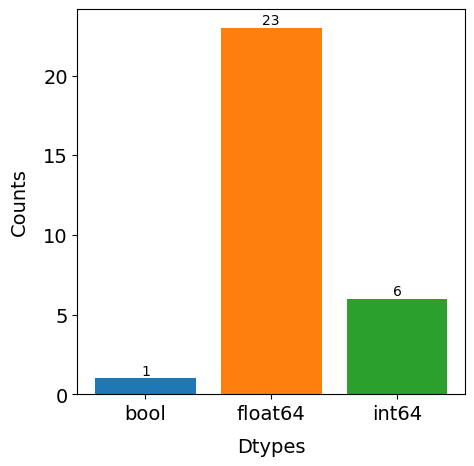

In [6]:
plotting.plot_dtypes_hist(data, '', 'Dtypes', 'Counts',
                          save_path=ppdai_prep_dataset_path + 'dtypes.pdf')

#### Data cleaning.

In [7]:
before_data_cleaning_count = len(data)

#### Rename features labels to have more meaningful names.

In [8]:
data.rename(columns={'label':'defaulted'}, inplace=True)

#### Plot class distribution.

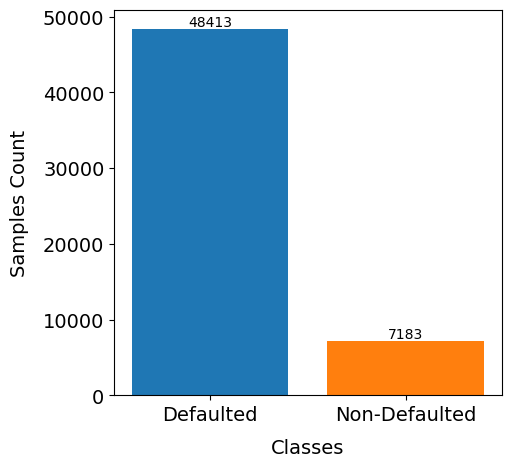

In [9]:
plotting.plot_hist(['Defaulted', 'Non-Defaulted'], data.defaulted.value_counts().values,
                   '', 'Classes', 'Samples Count',
                   save_path=ppdai_prep_dataset_path + 'class_distribution.pdf')

#### Plot missing values histogram.

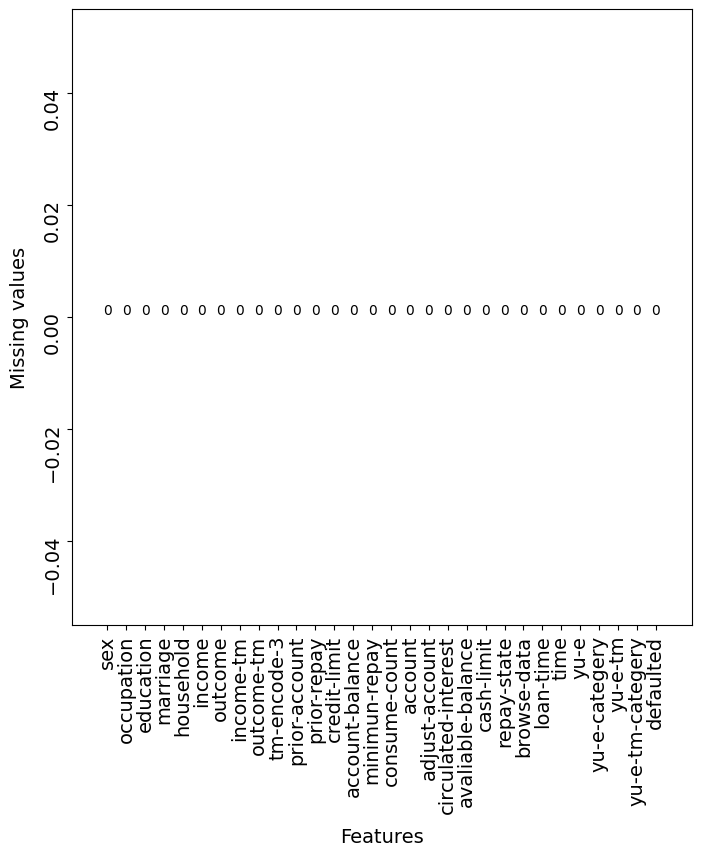

In [10]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(8,8),
                   rotated_ticks=True, save_path=ppdai_prep_dataset_path + 'missing_values-1.pdf')

#### Drop useless and ambiguous features.

In [11]:
data.drop(['loan-time'], axis=1, inplace=True)

#### Drop redundant features using IV score.
#### This was computed previously but getting rid of them a-priori helps next pre-processing steps.

In [12]:
data.drop(['income', 'income-tm', 'outcome', 'outcome-tm', 'adjust-account', 'account-balance', 'avaliable-balance', 'repay-state', 'yu-e', 'yu-e-tm'], axis=1, inplace=True)

#### Fix nominal features encoded as integers/floats.

In [13]:
data['sex'] = data['sex'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data['education'] = data['education'].astype('category')
data['marriage'] = data['marriage'].astype('category')
data['household'] = data['household'].astype('category')
data['yu-e-categery'] = data['yu-e-categery'].astype('category')
data['yu-e-tm-categery'] = data['yu-e-tm-categery'].astype('category')

#### Apply optimal binninf and WoE.

In [14]:
data, features_scores = preprocessing.opt_bin_woe(data=data, solver="cp",
                                                  outlier_detector="range",
                                                  save_path=ppdai_prep_dataset_path,
                                                  verbose=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:04<00:00,  4.39it/s]


In [15]:
data

,sex,occupation,education,marriage,household,tm-encode-3,prior-account,prior-repay,credit-limit,minimun-repay,consume-count,account,circulated-interest,cash-limit,browse-data,time,yu-e-categery,yu-e-tm-categery,defaulted
0,-0.067719,0.024517,0.024040,0.026343,0.094712,0.173198,-0.320838,-0.332093,0.015567,-0.008373,-0.109586,-0.250675,-0.056738,-0.254015,0.101374,0.184679,-0.226771,-0.286807,False
1,-0.067719,0.024517,0.024040,-0.085255,0.094712,0.173198,0.297504,0.147988,0.048281,-0.008373,-0.128770,0.211191,-0.056738,0.144357,0.217452,0.184679,0.050382,0.050805,False
2,-0.067719,-0.127574,-0.129615,0.026343,-0.059451,0.173198,-0.046936,0.283185,0.048281,-0.008373,-0.128770,-0.000582,-0.056738,-0.254015,0.060640,0.184679,-0.226771,-0.286807,False
3,-0.067719,-0.127574,-0.129615,0.001962,-0.087725,-0.145307,0.082360,-0.332093,0.214425,-0.008373,0.333966,0.094342,-0.056738,0.359069,0.060640,-0.383760,-0.226771,-0.286807,True
4,-0.067719,0.024517,0.341148,0.001962,0.094712,0.173198,-0.087270,0.283185,-0.081138,0.148778,-0.109586,-0.000582,-0.056738,-0.054921,0.101374,0.184679,0.050382,0.050805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,-0.067719,0.024517,0.024040,0.026343,-0.059451,1.089976,0.082360,-0.008310,0.091099,0.020049,-0.109586,0.287250,0.218527,0.165638,0.076775,1.430408,0.050382,0.050805,False
55592,-0.067719,-0.127574,0.341148,0.026343,-0.059451,-0.145307,0.082360,-0.072700,0.091099,-0.008373,-0.109586,0.094342,0.162153,0.144357,-0.005975,-0.156622,0.050382,0.050805,True
55593,-0.067719,0.024517,-0.129615,0.026343,-0.059451,-0.145307,-0.087270,0.174262,-0.081138,-0.008373,0.094861,-0.000582,-0.056738,0.359069,0.217452,-0.156622,0.050382,0.050805,False
55594,-0.067719,0.024517,0.024040,0.001962,-0.059451,0.173198,0.082360,-0.072700,0.015567,0.020049,0.117074,0.094342,0.162153,0.165638,0.217452,0.184679,0.050382,0.050805,False


#### All missing values handled.

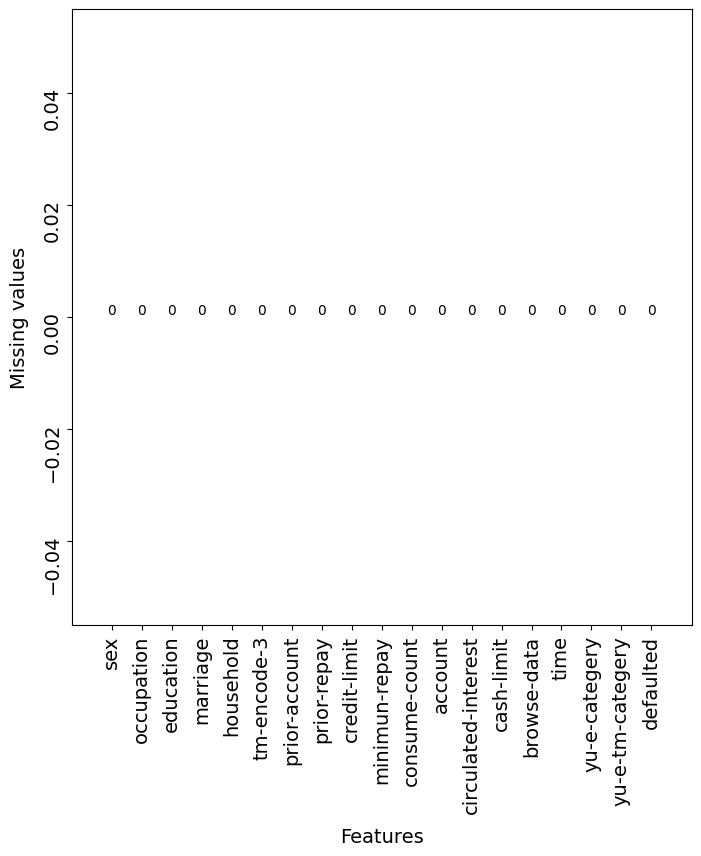

In [16]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(8,8),
                   rotated_ticks=True, save_path=ppdai_prep_dataset_path + 'missing_values-2.pdf')

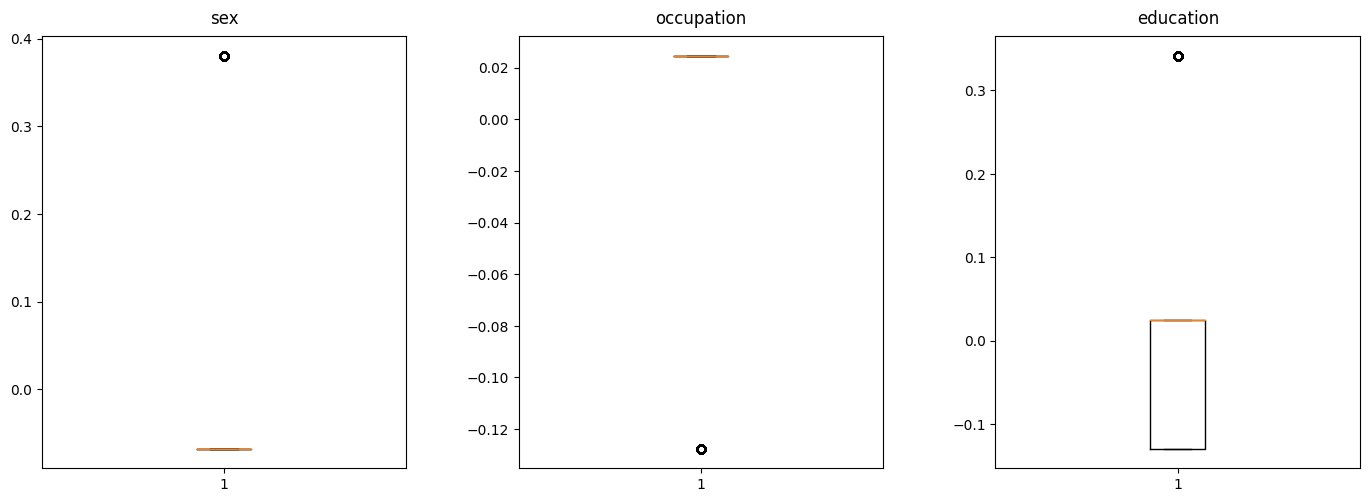

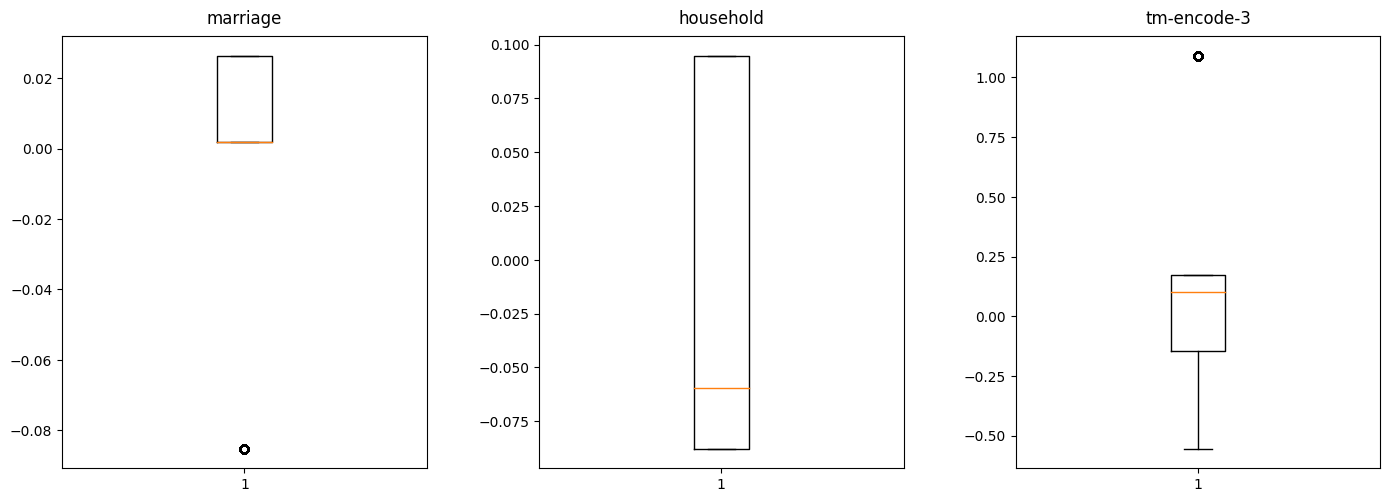

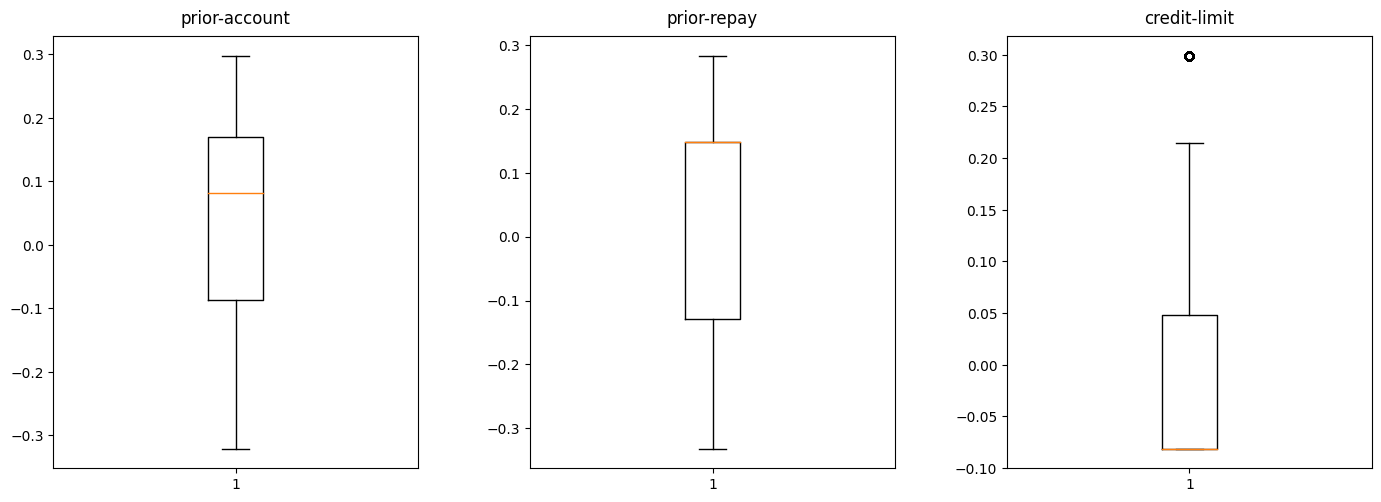

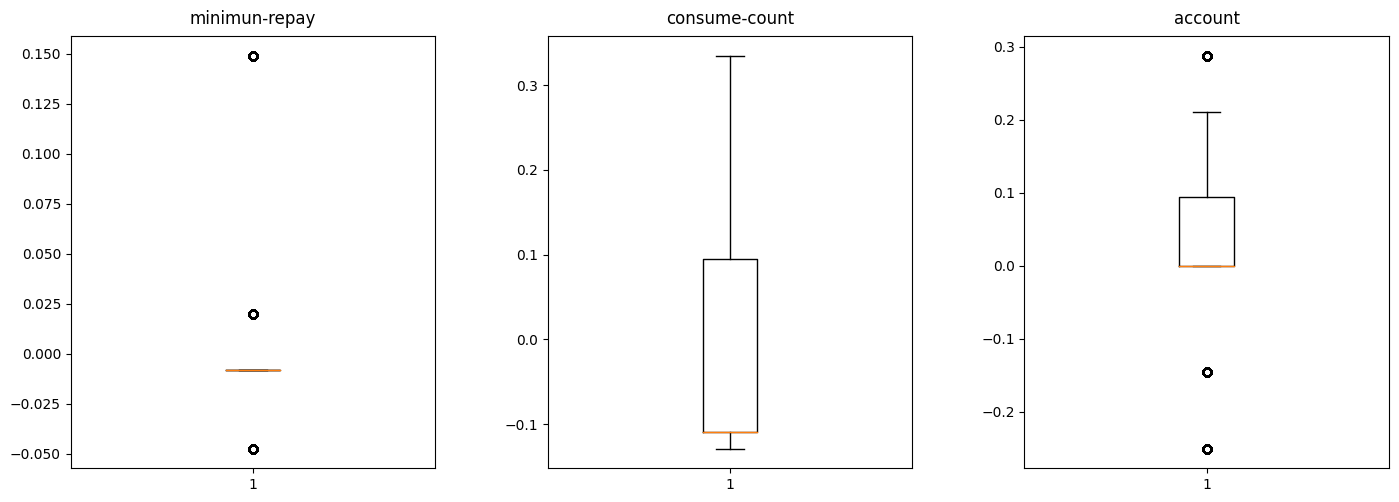

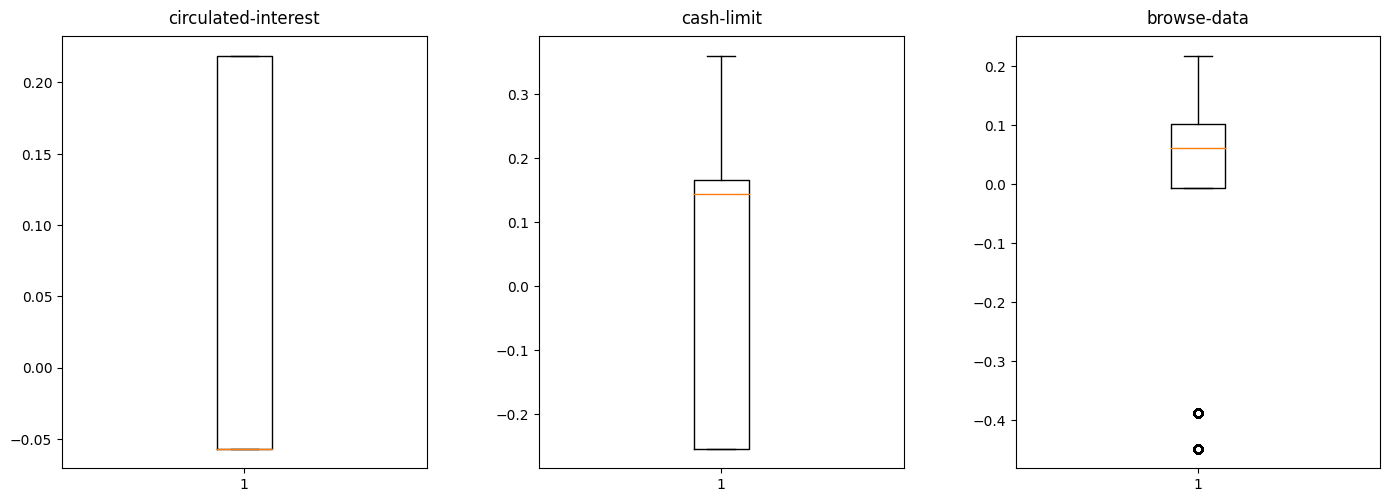

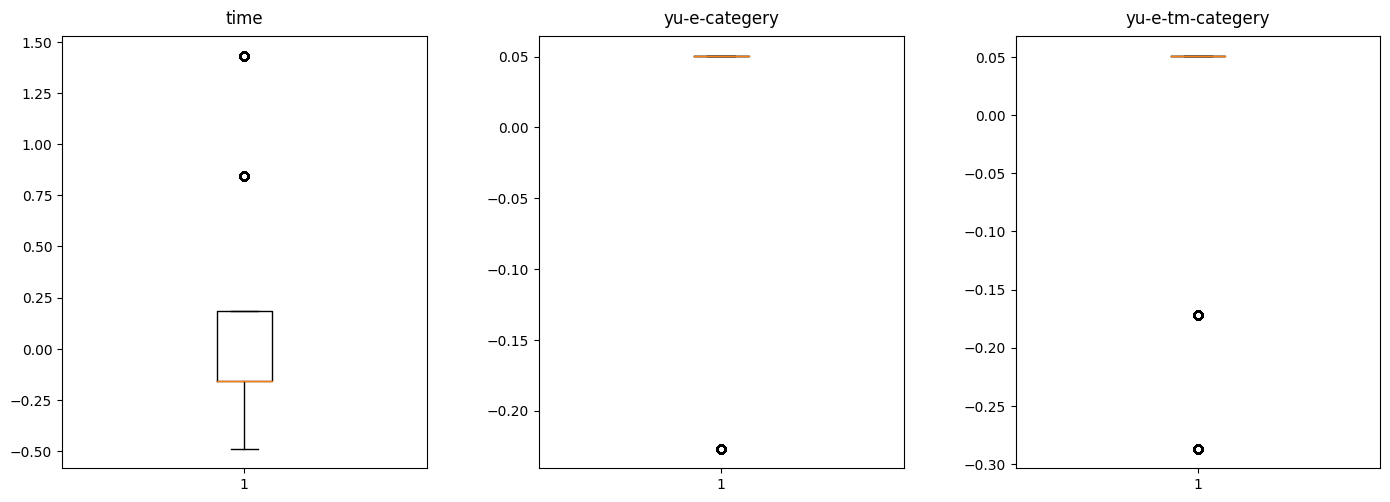

In [17]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=ppdai_prep_dataset_path)

In [18]:
#plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=ppdai_prep_dataset_path)

#### Plot samples count before and after Data cleaning.

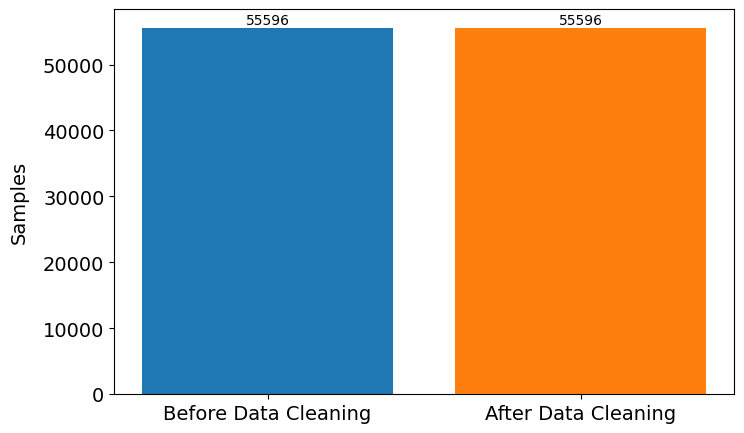

In [19]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=ppdai_prep_dataset_path + 'before_after.pdf')

#### Features IV scores

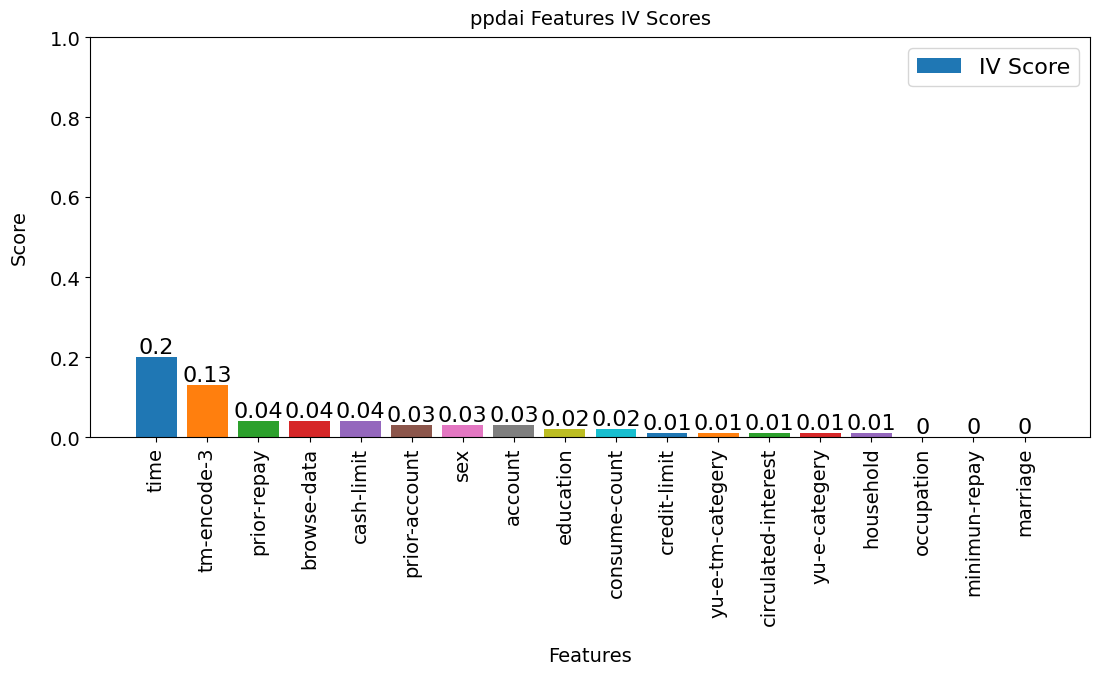

In [20]:
plotting.plot_features_scores(list(features_scores.keys()), list(features_scores.values()), 'ppdai Features IV Scores')

#### Features correlation

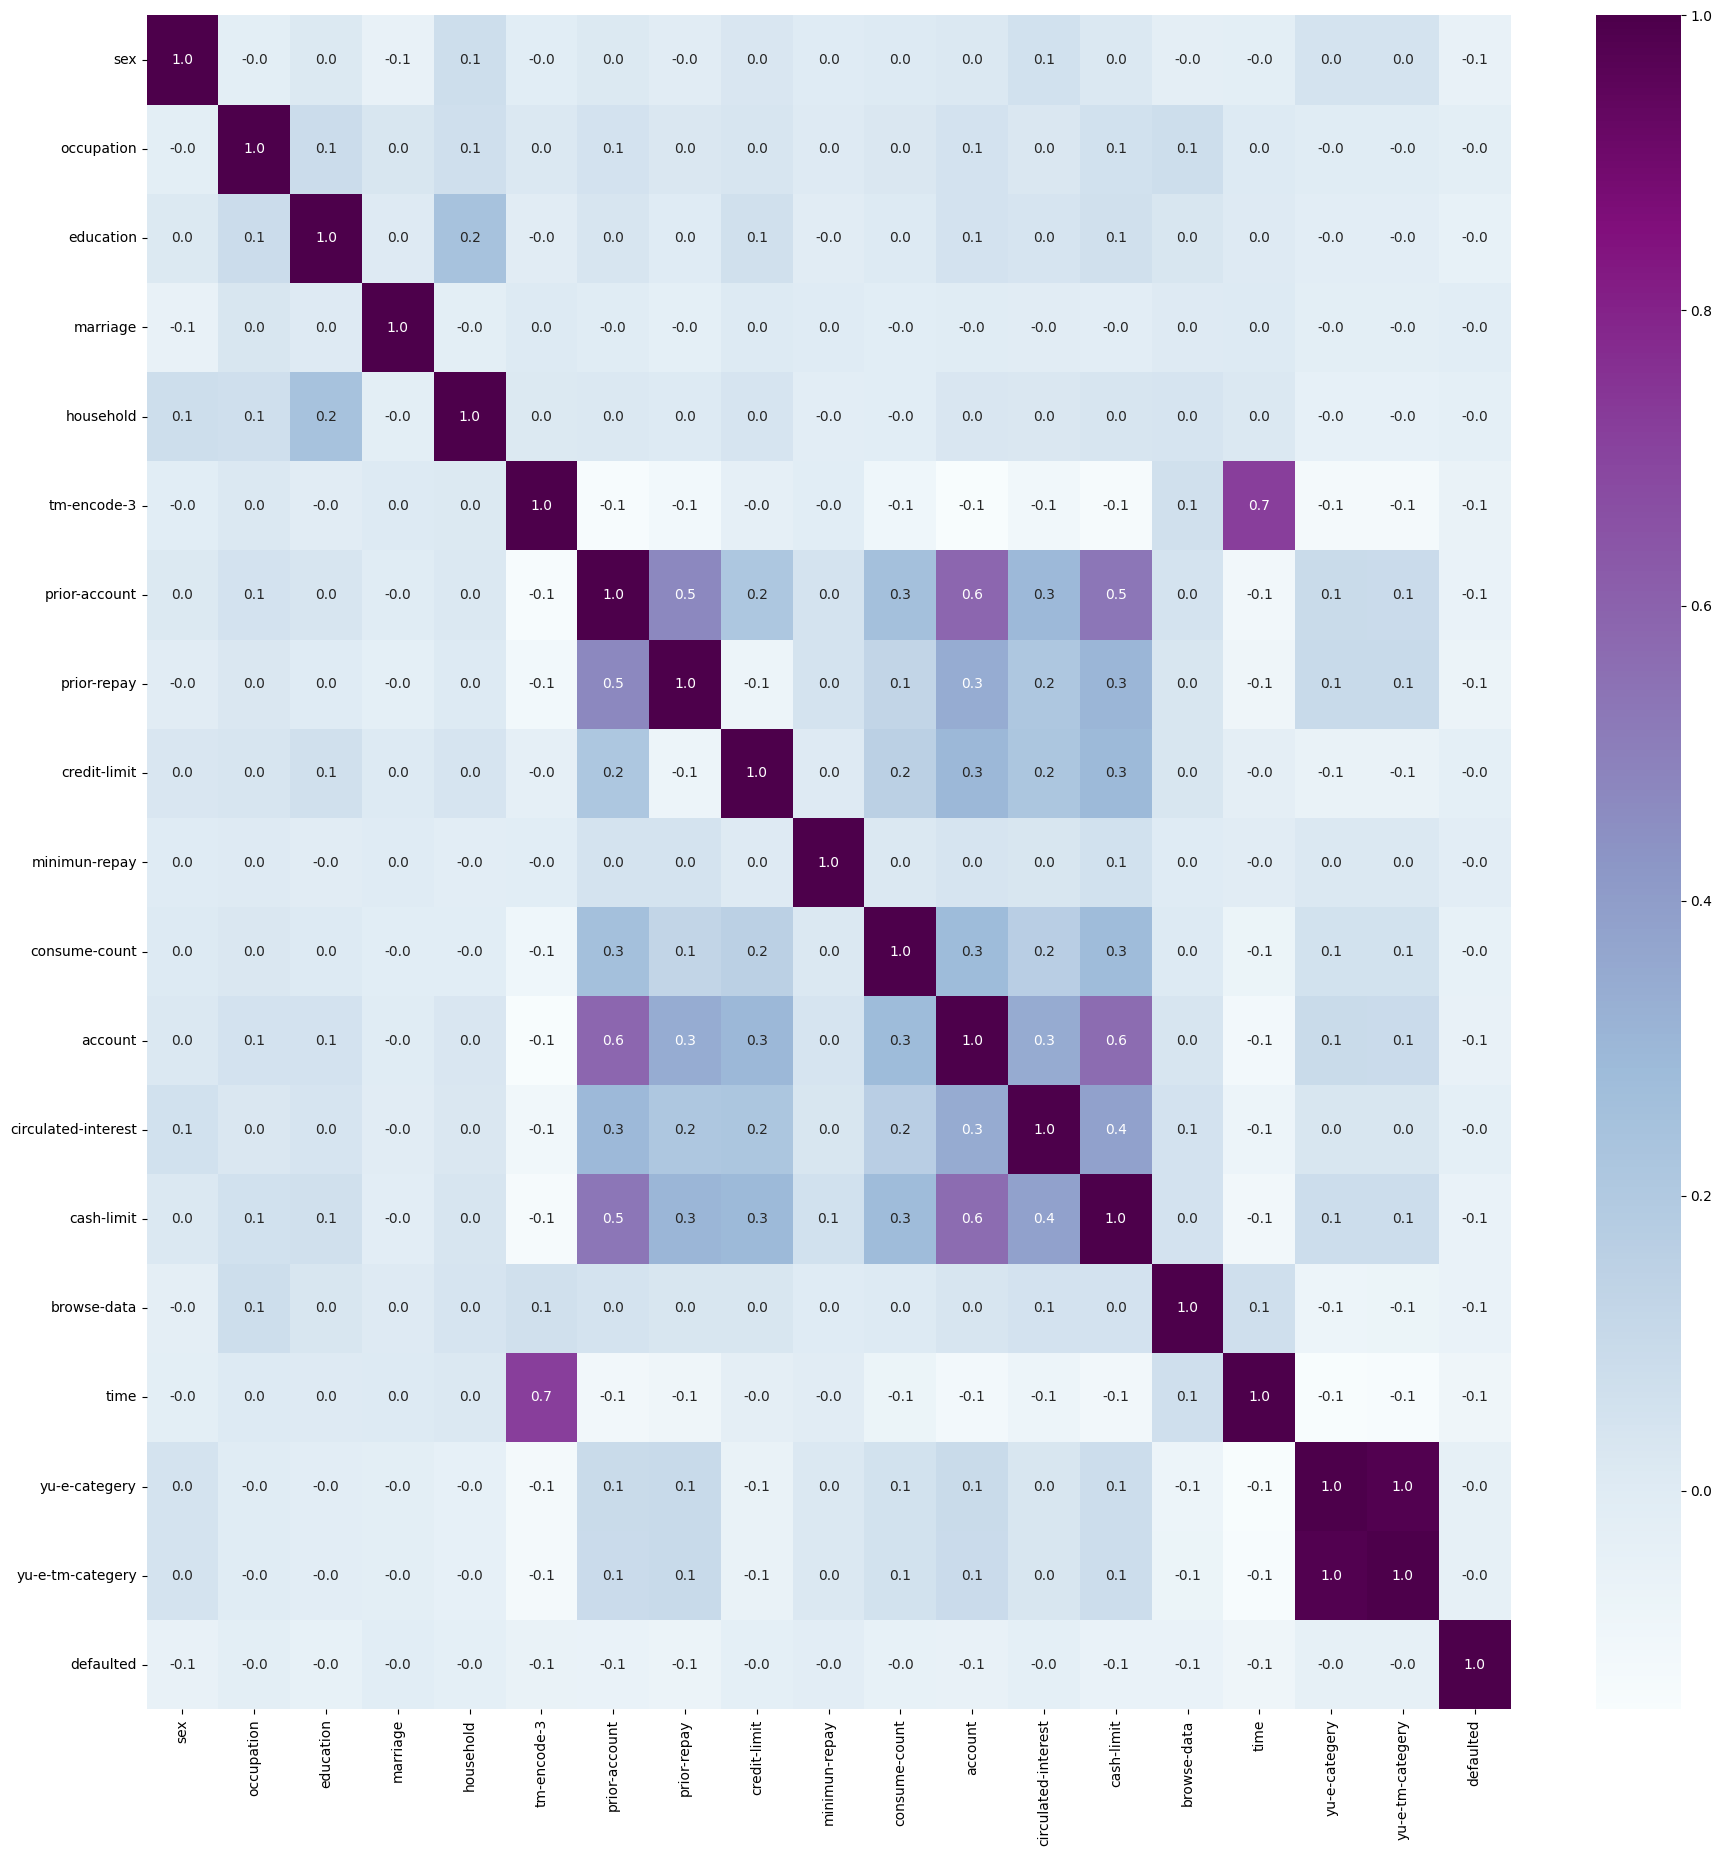

In [21]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(22, 22), save_path=ppdai_prep_dataset_path, dpi=100)

#### Drop redundant features using IV score.

In [22]:
data.drop(['yu-e-categery'], axis=1, inplace=True)

In [23]:
del features_scores['yu-e-categery']

#### Save preprocessed dataset.

In [24]:
data

,sex,occupation,education,marriage,household,tm-encode-3,prior-account,prior-repay,credit-limit,minimun-repay,consume-count,account,circulated-interest,cash-limit,browse-data,time,yu-e-tm-categery,defaulted
0,-0.067719,0.024517,0.024040,0.026343,0.094712,0.173198,-0.320838,-0.332093,0.015567,-0.008373,-0.109586,-0.250675,-0.056738,-0.254015,0.101374,0.184679,-0.286807,False
1,-0.067719,0.024517,0.024040,-0.085255,0.094712,0.173198,0.297504,0.147988,0.048281,-0.008373,-0.128770,0.211191,-0.056738,0.144357,0.217452,0.184679,0.050805,False
2,-0.067719,-0.127574,-0.129615,0.026343,-0.059451,0.173198,-0.046936,0.283185,0.048281,-0.008373,-0.128770,-0.000582,-0.056738,-0.254015,0.060640,0.184679,-0.286807,False
3,-0.067719,-0.127574,-0.129615,0.001962,-0.087725,-0.145307,0.082360,-0.332093,0.214425,-0.008373,0.333966,0.094342,-0.056738,0.359069,0.060640,-0.383760,-0.286807,True
4,-0.067719,0.024517,0.341148,0.001962,0.094712,0.173198,-0.087270,0.283185,-0.081138,0.148778,-0.109586,-0.000582,-0.056738,-0.054921,0.101374,0.184679,0.050805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,-0.067719,0.024517,0.024040,0.026343,-0.059451,1.089976,0.082360,-0.008310,0.091099,0.020049,-0.109586,0.287250,0.218527,0.165638,0.076775,1.430408,0.050805,False
55592,-0.067719,-0.127574,0.341148,0.026343,-0.059451,-0.145307,0.082360,-0.072700,0.091099,-0.008373,-0.109586,0.094342,0.162153,0.144357,-0.005975,-0.156622,0.050805,True
55593,-0.067719,0.024517,-0.129615,0.026343,-0.059451,-0.145307,-0.087270,0.174262,-0.081138,-0.008373,0.094861,-0.000582,-0.056738,0.359069,0.217452,-0.156622,0.050805,False
55594,-0.067719,0.024517,0.024040,0.001962,-0.059451,0.173198,0.082360,-0.072700,0.015567,0.020049,0.117074,0.094342,0.162153,0.165638,0.217452,0.184679,0.050805,False


In [25]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55596 entries, 0 to 55595
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  55596 non-null  float64
 1   occupation           55596 non-null  float64
 2   education            55596 non-null  float64
 3   marriage             55596 non-null  float64
 4   household            55596 non-null  float64
 5   tm-encode-3          55596 non-null  float64
 6   prior-account        55596 non-null  float64
 7   prior-repay          55596 non-null  float64
 8   credit-limit         55596 non-null  float64
 9   minimun-repay        55596 non-null  float64
 10  consume-count        55596 non-null  float64
 11  account              55596 non-null  float64
 12  circulated-interest  55596 non-null  float64
 13  cash-limit           55596 non-null  float64
 14  browse-data          55596 non-null  float64
 15  time                 55596 non-null 

**EMP-$p_1$:**

In [26]:
len(data[data['defaulted'] == True])/len(data)

0.1291999424419023

**EMP-$p_0$:**

In [27]:
len(data[data['defaulted'] == False])/len(data)

0.8708000575580978

In [28]:
utilities.save_dataset(data=data, features_scores=features_scores, test_size=0.2,
                       save_path=ppdai_prep_dataset_path)

Train split size: 44476
Test split size: 11120
